# Corpus Linguistics for Old Bailey Data

Load packages and data

In [1]:
import pandas as pd
import matplotlib as plt
from collections import defaultdict
%matplotlib inline

In [2]:
datafile="../../voa/OBV2/obv_words_v2_28-01-2017.tsv"
#datafile="worddata.tsv"

alldata=pd.DataFrame.from_csv(datafile,sep='\t')

/Users/juliewe/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Inspect sample of the data

In [3]:
alldata.head(20)


,sess_date,year,obo_trial,obo_deftid,obc_u_no,obc_event,obc_speaker,obc_sex,obc_hiscoLabel,obc_hiscoCode,obc_class,obc_role,obv_role,words,obv_words_type,words_count,defendant
obv2wid,,,,,,,,,,,,,,,,,
1,17800112,1780,t17800112-1,NaN,1,17800112-1,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"I live at No. 7, in Great Suffolk-street, Char...",s,40,MARY DYER
2,17800112,1780,t17800112-1,NaN,2,17800112-2,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Was that strange woman the prisoner?,q,6,MARY DYER
3,17800112,1780,t17800112-1,NaN,3,17800112-3,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,Yes; she said she only wanted a pint of purl.,a,10,MARY DYER
4,17800112,1780,t17800112-1,NaN,4,17800112-4,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Do you keep a public-house?,q,5,MARY DYER
5,17800112,1780,t17800112-1,NaN,5,17800112-5,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,"No, a private house. I sent for a constable, a...",a,16,MARY DYER
6,17800112,1780,t17800112-1,NaN,6,17800112-6,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Did you find any of your goods upon her?,q,9,MARY DYER
7,17800112,1780,t17800112-1,NaN,7,17800112-7,17800112-0042,m,Working Proprietor (Guest House),51040.0,higher (1-5),NaN,wv,No.,a,1,MARY DYER
8,17800112,1780,t17800112-1,t17800112-1-defend47,8,17800112-8,17800112-0041,f,NaN,NaN,NaN,NaN,def,I never saw him till now.,s,6,MARY DYER
9,17800112,1780,t17800112-1,NaN,9,17800112-9,17800112-?LAW,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,Did you ever see the woman before that time?,q,9,MARY DYER


Define functions to build corpora according to metadata

In [4]:
alldata['words'].head()

obv2wid
1    I live at No. 7, in Great Suffolk-street, Char...
2                 Was that strange woman the prisoner?
3        Yes; she said she only wanted a pint of purl.
4                          Do you keep a public-house?
5    No, a private house. I sent for a constable, a...
Name: words, dtype: object

In [5]:
restriction=alldata[alldata['obc_sex']=='m']
selection=restriction['words']
selection.head()

obv2wid
1    I live at No. 7, in Great Suffolk-street, Char...
2                 Was that strange woman the prisoner?
3        Yes; she said she only wanted a pint of purl.
4                          Do you keep a public-house?
5    No, a private house. I sent for a constable, a...
Name: words, dtype: object

In [3]:
def make_countdict(alldata):
    countdict={}
    blacklist=['words','obc_hiscoCode']

    for heading in alldata.columns:
        #print('Generating counts for ' +heading)
        if heading not in blacklist:
            countdict[heading]=defaultdict(int)
            selection = alldata[heading]
            for item in selection:
                #print(item)
                countdict[heading][item]+=1
        else:
            #print('skipping')
            pass

    return countdict

countdict=make_countdict(alldata)
    
aheading=alldata.columns[3]
print(countdict[aheading])



defaultdict(<class 'int'>, {nan: 203123, 't17800112-1-defend47': 3, 't17800112-3-defend68': 3, 't17800112-4-defend82': 2, 't17800112-5-defend123': 3, 't17800112-6-defend130': 3, 't17800112-7-defend145': 1, 't17800112-8-defend157': 2, 't17800112-10-defend178': 3, 't17800112-11-defend189': 1, 't17800112-13-defend205': 1, 't17800112-15-defend238': 1, 't17800112-16-defend244': 1, 't17800112-19-defend274': 1, 't17800112-21-defend296': 1, 't17800112-23-defend331': 1, 't17800112-24-defend339': 2, 't17800112-25-defend344': 1, 't17800112-26-defend358': 1, 't17800112-28-defend373': 3, 't17800112-29-defend387': 2, 't17800112-30-defend398': 1, 't17800112-31-defend407': 2, 't17800112-32-defend424': 1, 't17800112-34-defend443': 1, 't17800112-35-defend449': 1, 't17800223-1-defend44': 1, 't17800223-3-defend67': 1, 't17800223-4-defend78': 2, 't17800223-5-defend95': 1, 't17800223-6-defend104': 2, 't17800223-8-defend119': 1, 't17800223-9-defend126': 1, 't17800223-11-defend156': 10, 't17800223-12-defend17

In [4]:
def histogram_values(heading="",column=1):
    if heading=="":
        if column<17:
            heading=alldata.columns[column]
        else:
            print("Column number must be less than 17")
#    print(countdict[heading])
    if heading in countdict.keys():
        countdf=pd.DataFrame.from_dict(countdict[heading],orient='index')
    
        countdf.plot.bar(title=heading,legend=False,figsize=(20,10),fontsize=20)
    else:
        print("No counts stored for "+heading)

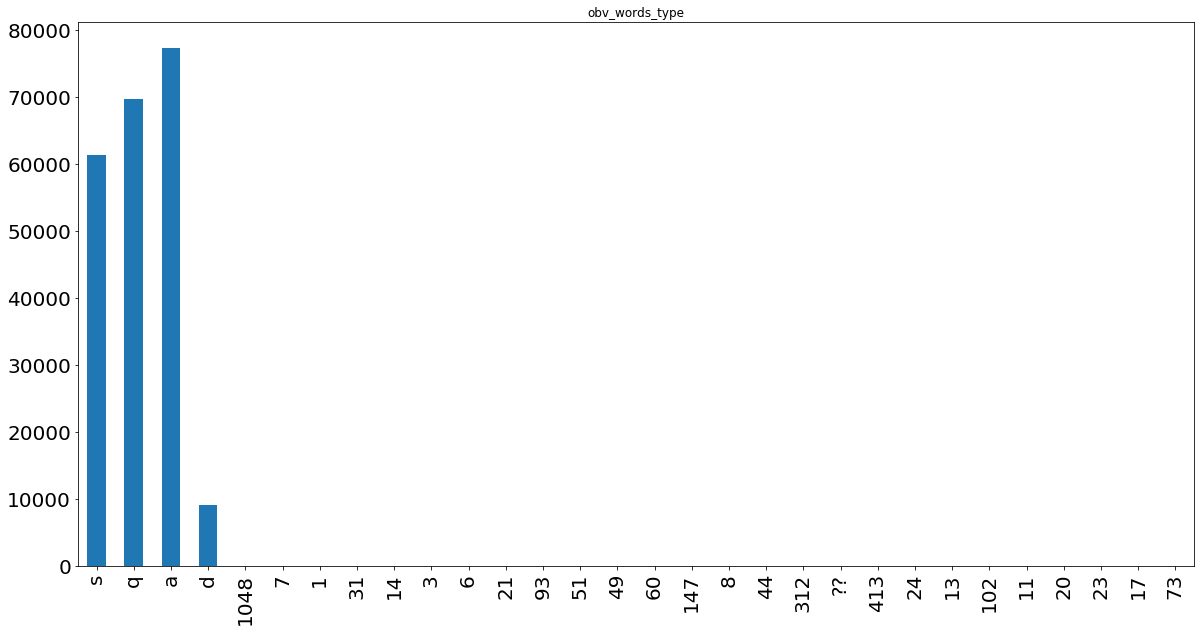

In [8]:
histogram_values(heading='obv_words_type')

Data appears dirty.  Lets find the examples where obv_words_type isn't in {s,q,a,d}

In [9]:
validtypes=['s','q','a','d']
restriction = alldata[~alldata.obv_words_type.isin(validtypes)]
print(restriction.count())
restriction

sess_date         30
year              30
obo_trial         30
obo_deftid         5
obc_u_no          30
obc_event         30
obc_speaker       30
obc_sex           26
obc_hiscoLabel    16
obc_hiscoCode     17
obc_class         16
obc_role          26
obv_role          30
words             30
obv_words_type    30
words_count       30
defendant          1
dtype: int64


,sess_date,year,obo_trial,obo_deftid,obc_u_no,obc_event,obc_speaker,obc_sex,obc_hiscoLabel,obc_hiscoCode,obc_class,obc_role,obv_role,words,obv_words_type,words_count,defendant
obv2wid,,,,,,,,,,,,,,,,,
20442,17850406,1785,t17850406-13,t17850406-13-defend195,78,17850406-549,17850406-0128,m,NaN,NaN,NaN,NaN,def,With humble submission I entreat your candid a...,1048,GEORGE BARRINGTON,NaN
61555,17970920,1797,t17970920-97,NaN,10,17970920-3546,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,"She was not made fast there then.\""\ta""",7,ROBERT HARRIS,NaN
61559,17970920,1797,t17970920-97,NaN,14,17970920-3550,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,"No.\""\ta""",1,ROBERT HARRIS,NaN
61562,17970920,1797,t17970920-97,NaN,17,17970920-3553,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,a stick that had not got a fastening put on it...,31,ROBERT HARRIS,NaN
61564,17970920,1797,t17970920-97,NaN,19,17970920-3555,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,I won't speak to swear it; it might be half an...,14,ROBERT HARRIS,NaN
61566,17970920,1797,t17970920-97,NaN,21,17970920-3557,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,"I wont say.\""\ta""",3,ROBERT HARRIS,NaN
61568,17970920,1797,t17970920-97,NaN,23,17970920-3559,17970920-0457,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,"Not when Mr. Young cut it.\""\ta""",6,ROBERT HARRIS,NaN
74876,18001203,1800,t18001203-40,NaN,60,18001203-724,18001203-0149,m,Lawyer,12110.0,higher (1-5),Lawyer,lj,"Do you recollect the man saying, that Partridg...",21,CHARLES COLTON,NaN
145861,18341205,1834,t18341205-314,NaN,20,18341205-945,18341205-0579,m,"Clerical or Related Worker, Specialisation Unk...",30000.0,higher (1-5),Witness,wv,"There were four present, but I believe only (M...",93,JOSEPH AUTEY,NaN


In [5]:
def validated(reqlist,valuedata):
    
    reqdict={}
    for (field,value) in reqlist:
        
        parts=field.split(':')
        if len(parts)==1:
            if field in valuedata.keys():
                if value in valuedata[field].keys():
                    reqdict[field]=value
        else:
            if (parts[1]=="max" or parts[1]=="min") and parts[0] in valuedata.keys():
                if value in valuedata[parts[0]].keys() and isinstance(value,int):
                    reqdict[field]=value
    return reqdict
            

def build_and_corpus(reqlist,df):
    reqdict=validated(reqlist,make_countdict(df))
    print("Building corpus which satisfies all of the following requirements: "+str(reqdict))
    
    current=df
    for req in reqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                current=current[current[parts[0]]<=reqdict[req]]
            elif parts[1]=='min':
                current=current[current[parts[0]]>=reqdict[req]]
        else:
            current=current[current[req]==reqdict[req]]
        
    selection=current['words']
    return selection
#print(alldata.columns)    

def generate_corpus(characteristics):
    output_file="corpus"
    for (_,characteristic) in characteristics:
        output_file+="_"+str(characteristic)

    selection=build_and_corpus(characteristics,alldata)

    #print(selection)

    with open(output_file,"w") as output:
    
        for item in selection:
            output.write(item+"\n")

In [6]:
#build answer corpus

characteristics=[('obc_sex','f'),('obv_role','wv'),('obv_words_type','a')]
generate_corpus(characteristics)

Building corpus which satisfies all of the following requirements: {'obc_sex': 'f', 'obv_role': 'wv', 'obv_words_type': 'a'}


### Restricting to a Range of Years

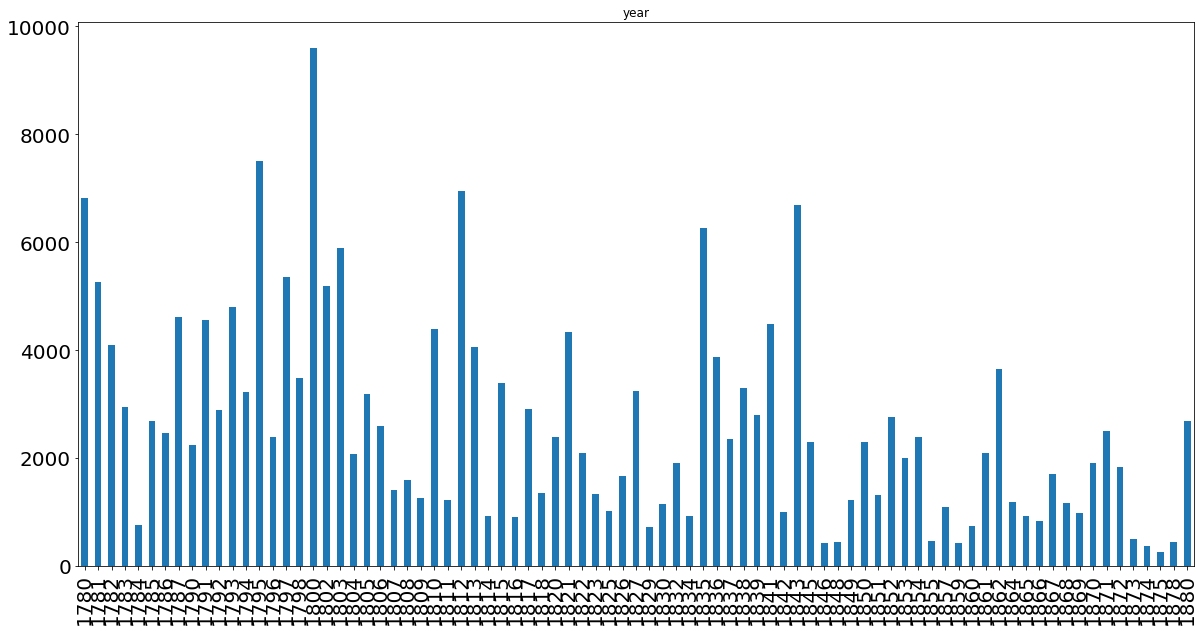

In [7]:
histogram_values(heading='year')

In [13]:
characteristics=[('year:max',1820),('year:min',1800)]
year1800=build_and_corpus(characteristics,alldata)
print(len(year1800))

Building corpus which satisfies all of the following requirements: {'year:max': 1820, 'year:min': 1800}
61275


In [14]:
#build answer corpus

characteristics=[('obc_sex','m'),('obv_role','def'),('year:max',1820),('year:min',1800)]
generate_corpus(characteristics)

Building corpus which satisfies all of the following requirements: {'obc_sex': 'm', 'obv_role': 'def', 'year:max': 1820, 'year:min': 1800}


## Question and Answer Corpora

Want to examine matched corpora e.g., the questions asked of and the responses of female witnesses (compared to male witnesses)


In [15]:
def build_qa_corpora(reqlist,df):
    
    qcorpus="questions"
    acorpus="answers"
    meta="meta"
    for (_,characteristic) in reqlist:
        qcorpus+="_"+str(characteristic)
        acorpus+="_"+str(characteristic)
        meta+="_"+str(characteristic)
    qtuple=('obv_words_type','q')
    atuple=('obv_words_type','a')
    reqlist.append(atuple)
    reqdict=validated(reqlist,make_countdict(df))
    
    answers=df
    for req in reqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                answers=answers[answers[parts[0]]<=reqdict[req]]
            elif parts[1]=='min':
                answers=answers[answers[parts[0]]>=reqdict[req]]
        else:
            answers=answers[answers[req]==reqdict[req]]
        
    
    wids=[]
    for index,row in answers.iterrows():
        wids.append(index)
    #print(wids)
    print(len(wids))
    
    words_questions=[]
    words_answers=[]
    metadata=[]
    count=0
    pwid=0
    for wid in wids:
        qid=wid-1
        
        arow=df.loc[wid]
        
        cont=True
        while cont:
            try:
                qrow=df.loc[qid]
                cont=False
                found=True
            except:
                if qid>pwid:
                    qid-=1
                else:
                    cont=False
                    found=False
                    
        if found and qrow['obv_words_type']=='q' and qrow['obo_trial']==arow['obo_trial']:
            count+=1
            #if count<10:
            #    print(qrow['words'])
            #    print(arow['words'])
            words_questions.append(qrow['words'])
            words_answers.append(arow['words'])
            metadata.append((qrow['obo_trial'],qid,wid))
        pwid=wid
        
    print(count)
    
    

    with open(qcorpus,"w") as qout:
        with open(acorpus,"w") as aout:
            with open(meta,"w") as mout:
                for idx,metarow in enumerate(metadata):
                    mout.write("{}\t{}\t{}\n".format(metarow[0],metarow[1],metarow[2]))
                    qout.write(words_questions[idx]+"\n")
                    aout.write(words_answers[idx]+"\n")
    
    
reqlist=[('obv_role','wv'),('obc_sex','f'),('year:max',1820),('year:min',1800)]
build_qa_corpora(reqlist,alldata)


4633
4438


In [16]:
reqlist=[('obv_role','wv'),('obc_sex','m'),('year:max',1820),('year:min',1800)]
build_qa_corpora(reqlist,alldata)

18405
17459


## Trial Data

In [13]:
worddatafile="../../voa/OBV2/obv_words_v2_28-01-2017.tsv"
trialdatafile="../../voa/OBV2/obv_defendants_trials.tsv"

worddata=pd.DataFrame.from_csv(worddatafile,sep='\t')
trialdata=pd.DataFrame.from_csv(trialdatafile,sep='\t')

/Users/juliewe/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Here is a sample of the trial data.

In [18]:
trialdata.head()

,obo_trial,obo_deftid,sess_date,year,trial_tagged,obv_def_spk,speech,trial_u_count,trial_speech_wc,trial_total_wc,...,deft_surname,deft_gender,deft_age,deft_occupation,deft_offcat,deft_offsub,deft_vercat,deft_versub,deft_puncat,deft_punsub
o2dtid,,,,,,,,,,,,,,,,,,,,,
1,t17800112-1,t17800112-1-defend47,17800112,1780,1,1.0,deft_speaks,39.0,736.0,809,...,DYER,female,NaN,NaN,theft,grandLarceny,guilty,NaN,imprison,newgate
2,t17800112-2,t17800112-2-defend53,17800112,1780,1,0.0,deft_silent,92.0,1897.0,2125,...,FRANK,male,NaN,NaN,theft,burglary,guilty,NaN,death,NaN
3,t17800112-3,t17800112-3-defend68,17800112,1780,1,1.0,deft_speaks,29.0,2064.0,2176,...,McCORMICK,male,NaN,NaN,theft,theftFromPlace,guilty,NaN,death,NaN
4,t17800112-4,t17800112-4-defend82,17800112,1780,1,1.0,deft_speaks,254.0,3872.0,4129,...,GOULD,female,NaN,wife,theft,theftFromPlace,guilty,lesserOffence,imprison,houseOfCorrection
5,t17800112-5,t17800112-5-defend123,17800112,1780,1,1.0,deft_speaks,17.0,513.0,572,...,MORGAN,male,NaN,NaN,theft,grandLarceny,notGuilty,NaN,NaN,NaN


In [19]:

perioddata=trialdata[trialdata['year'].isin(range(1800,1821,1))]
#perioddata.head()
perioddata.describe()

,sess_date,year,trial_tagged,obv_def_spk,trial_u_count,trial_speech_wc,trial_total_wc,deft_u_count,deft_total_wc,deft_u_q,deft_u_a,deft_u_d,deft_u_s,deft_age
count,4.735000e+03,4735.000000,4735.000000,4278.000000,4272.000000,4272.000000,4735.000000,4272.000000,4272.000000,4272.000000,4272.000000,4272.000000,4272.000000,3262.000000
mean,1.811341e+07,1811.281098,0.902218,0.643525,14.343399,419.211376,468.412038,0.738998,28.350421,0.070693,0.005852,0.638109,0.024345,29.909258
std,6.388092e+04,6.387151,0.297052,0.479014,37.726260,658.649077,746.039577,0.739554,75.012829,0.416992,0.087706,0.489294,0.188320,12.724418
min,1.800012e+07,1800.000000,0.000000,0.000000,1.000000,4.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,1.805022e+07,1805.000000,1.000000,0.000000,3.000000,137.750000,164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,1.813011e+07,1813.000000,1.000000,1.000000,5.000000,246.000000,284.000000,1.000000,9.000000,0.000000,0.000000,1.000000,0.000000,27.000000
75%,1.817052e+07,1817.000000,1.000000,1.000000,11.000000,453.000000,505.500000,1.000000,31.000000,0.000000,0.000000,1.000000,0.000000,37.000000
max,1.820121e+07,1820.000000,1.000000,1.000000,1091.000000,18152.000000,20291.000000,10.000000,2400.000000,9.000000,2.000000,4.000000,3.000000,84.000000


Create corpora where some of the characteristics come from the trial data.

In [14]:
def build_corpus(worddf,trialdf,reqlist,join='obo_trial'):
    
    trialreqdict=validated(reqlist,make_countdict(trialdf))
    wordsreqdict=validated(reqlist,make_countdict(worddf))
    
    trials=trialdf
    for req in trialreqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                trials=trials[trials[parts[0]]<=trialreqdict[req]]
            elif parts[1]=='min':
                trials=trials[trials[parts[0]]>=trialreqdict[req]]
        else:
            trials=trials[trials[req]==trialreqdict[req]]
            
    wdf =worddf[worddf[join].isin(trials[join])]
    #print(wdf.head())
    for req in wordsreqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                wdf=wdf[wdf[parts[0]]<=wordsreqdict[req]]
            elif parts[1]=='min':
                wdf=wdf[wdf[parts[0]]>=wordsreqdict[req]]
        else:
            wdf=wdf[wdf[req]==wordsreqdict[req]]
            
    selection=[line for line in wdf['words']]
    return selection

def corpus_generator(characteristics,wdf,tdf,join='obo_trial'):
    output_file="corpus"
    for (_,characteristic) in characteristics:
        output_file+="_"+str(characteristic)

    selection=build_corpus(wdf,tdf,characteristics,join=join)

    #print(selection)

    with open(output_file,"w") as output:    
        for item in selection:
            output.write(item+"\n")
    print("Generated corpus {} with {} lines".format(output_file,str(len(selection))))
    return(len(selection))


In [15]:

allreqlist=[('obv_role','def'),('year:max',1820),('year:min',1800)]
genders=[('deft_gender','female'),('deft_gender','male')]
agegroups=['8-24','25-50','51-84']

def getages():
    mins=[]
    maxes=[]
    for agroup in agegroups:
        parts=agroup.split('-')
        mins.append(int(parts[0]))
        maxes.append(int(parts[1]))
        
    return mins,maxes

mins,maxes=getages()

speechvalues={}
for (_,gender) in genders:
    vs=[]
    for mini,maxi,agegroup in zip(mins,maxes,agegroups):
        reqlist=allreqlist+[('deft_gender',gender),('deft_age:min',mini),('deft_age:max',maxi)]
        vs.append(corpus_generator(reqlist,worddata,trialdata))
        
    speechvalues[gender]=vs


Generated corpus corpus_def_1820_1800_female_8_24 with 150 lines


KeyboardInterrupt: 

In [16]:
allreqlist=[('deft_offcat','theft')]
roles=[('obv_role','def'),('obv_role','wv')]
yeargroups=['1800-1805','1806-1815','1816-1820']

def getages(agegroups):
    mins=[]
    maxes=[]
    for agroup in agegroups:
        parts=agroup.split('-')
        mins.append(int(parts[0]))
        maxes.append(int(parts[1]))
        
    return mins,maxes

mins,maxes=getages(yeargroups)

speechvalues={}
for (_,role) in roles:
    vs=[]
    for mini,maxi,yeargroup in zip(mins,maxes,yeargroups):
        reqlist=allreqlist+[('obv_role',role),('year:min',mini),('year:max',maxi)]
        vs.append(corpus_generator(reqlist,worddata,trialdata))
        
    speechvalues[gender]=vs




Generated corpus corpus_theft_def_1800_1805 with 856 lines
Generated corpus corpus_theft_def_1806_1815 with 1094 lines
Generated corpus corpus_theft_def_1816_1820 with 770 lines
Generated corpus corpus_theft_wv_1800_1805 with 9615 lines
Generated corpus corpus_theft_wv_1806_1815 with 11706 lines
Generated corpus corpus_theft_wv_1816_1820 with 4401 lines


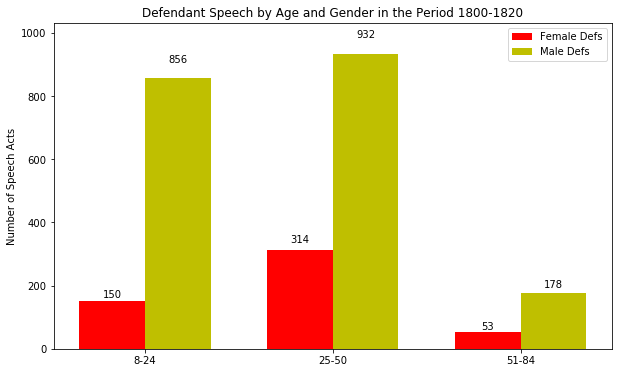

In [22]:
import numpy as np
import matplotlib.pyplot as plt

N = len(agegroups)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(ind, speechvalues['female'], width, color='r')

rects2 = ax.bar(ind + width, speechvalues['male'], width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Speech Acts')
ax.set_title('Defendant Speech by Age and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(agegroups)

ax.legend((rects1[0], rects2[0]), ('Female Defs', 'Male Defs'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

maxheight=max(speechvalues['female']+speechvalues['male'])
ax.set_ylim([0,maxheight+100])
autolabel(rects1)
autolabel(rects2)

plt.show()

In [23]:
allreqlist=[('year:max',1820),('year:min',1800)]
genders=[('deft_gender','female'),('deft_gender','male')]
agegroups=['8-24','25-50','51-84']

def getages():
    mins=[]
    maxes=[]
    for agroup in agegroups:
        parts=agroup.split('-')
        mins.append(int(parts[0]))
        maxes.append(int(parts[1]))
        
    return mins,maxes

mins,maxes=getages()




def select(df,reqdict):
    selection=df
    for req in reqdict.keys():
        parts=req.split(':')
        if len(parts)>1:
            if parts[1]=='max':
                selection=selection[selection[parts[0]]<=reqdict[req]]
            elif parts[1]=='min':
                selection=selection[selection[parts[0]]>=reqdict[req]]
        else:
            selection=selection[selection[req]==reqdict[req]]  
            
    return selection

reqdict=validated(allreqlist,make_countdict(trialdata))
period=select(trialdata,reqdict)


myvalues={}
for gender in genders:
    mykeys=[]
    myvalues[gender[1]]=[]
    thisreqlist=[gender]
    for mini,maxi,agegroup in zip(mins,maxes,agegroups):
        thisreqlist.append(('deft_age:min',mini))
        thisreqlist.append(('deft_age:max',maxi))
        
        reqdict=validated(thisreqlist,make_countdict(period))
        
        print(reqdict)
        selection=select(period,reqdict)
        mykeys.append(agegroup)
        myvalues[gender[1]].append(len(selection))
        print("{} : {} : {} : {}".format(gender,mini,maxi,len(selection)))
        
print(mykeys)
print(myvalues)

{'deft_gender': 'female', 'deft_age:min': 8, 'deft_age:max': 24}
('deft_gender', 'female') : 8 : 24 : 237
{'deft_gender': 'female', 'deft_age:min': 25, 'deft_age:max': 50}
('deft_gender', 'female') : 25 : 50 : 420
{'deft_gender': 'female', 'deft_age:min': 51, 'deft_age:max': 84}
('deft_gender', 'female') : 51 : 84 : 65
{'deft_gender': 'male', 'deft_age:min': 8, 'deft_age:max': 24}
('deft_gender', 'male') : 8 : 24 : 1150
{'deft_gender': 'male', 'deft_age:min': 25, 'deft_age:max': 50}
('deft_gender', 'male') : 25 : 50 : 1184
{'deft_gender': 'male', 'deft_age:min': 51, 'deft_age:max': 84}
('deft_gender', 'male') : 51 : 84 : 206
['8-24', '25-50', '51-84']
{'female': [237, 420, 65], 'male': [1150, 1184, 206]}


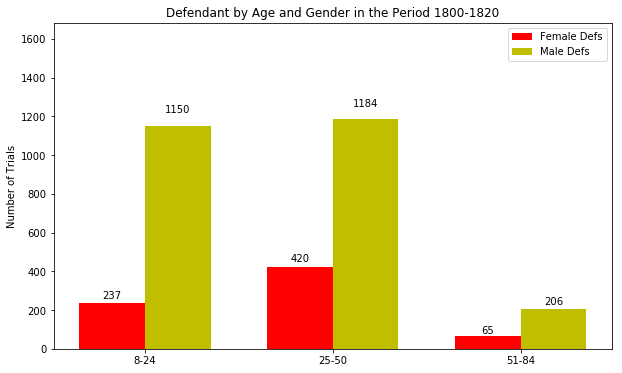

In [24]:
N = len(mykeys)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(ind, myvalues['female'], width, color='r')

rects2 = ax.bar(ind + width, myvalues['male'], width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Trials')
ax.set_title('Defendant by Age and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(mykeys)

ax.legend((rects1[0], rects2[0]), ('Female Defs', 'Male Defs'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

maxheight=max(max(myvalues['female']),max(myvalues['male']))
ax.set_ylim([0,maxheight+500])
autolabel(rects1)
autolabel(rects2)

plt.show()

## Statistical Significance of Distributions

Is age and gender independent for trial data?

Is distribution of age and gender the same for speech and trial data?

In [25]:
from scipy.stats import chi2_contingency
def chisquare_cont(table):
    matrix=[]
    for value in table.values():
        matrix.append(np.array(value))
    matrix=np.array(matrix)
    print("Observed values:")
    print(matrix)
    print("Chi-square, significance, dof, expected values:")
    print(chi2_contingency(matrix))

In [26]:
chisquare_cont(myvalues)

Observed values:
[[ 237  420   65]
 [1150 1184  206]]
Chi-square, significance, dof, expected values:
(36.305863897877231, 1.307018769140532e-08, 2, array([[  306.99386879,   355.02391171,    59.9822195 ],
       [ 1080.00613121,  1248.97608829,   211.0177805 ]]))


These observed values are extremely unlikely to occur by chance if the dimensions gender and age are independent, so we accept that these dimensions are not independent.

In [27]:
from scipy.stats import chisquare

def chi_square(observed, prior):
    obslist=[]
    priorlist=[]
    for key in observed.keys():
        obslist+=observed[key]
        priorlist+=prior[key]
        #should really check they are the same length and have the same keys etc
        
    obstotal=sum(obslist)
    priortotal=sum(priorlist)
    
    explist=[item * obstotal/priortotal for item in priorlist]
    
    print("Observations: {}".format(obslist))
    print("Expected observations: {}".format(explist))
    print(chisquare(obslist,explist))

In [28]:

chi_square(speechvalues,myvalues)

Observations: [150, 314, 53, 856, 932, 178]
Expected observations: [180.40190067443285, 319.69957081545067, 49.4773145309626, 875.3678724708768, 901.2483139178419, 156.80502759043532]
Power_divergenceResult(statistic=9.8185265331797762, pvalue=0.080543578925848777)


The speech distribution is significantly different to the trial distribution at 1% level for gender/age (p=0.006).  In particular younger women (under 27) and the youngest men (under 20) are speaking less than would be expected.  Older men are speaking more than would be expected.

## Producers
Pulling in and checking info in the new producers file

In [29]:
producersdatafile="../../voa/OBV2/obc2_producers.tsv"
proddf=pd.DataFrame.from_csv(producersdatafile,sep='\t')
proddf.head()

,sess_date,editor,printer,publisher,scribe
year,,,,,
1780-01-01,17800112,na,na,Gurney,Gurney
1780-01-01,17800223,na,na,Gurney,Gurney
1780-01-01,17800405,na,na,Gurney,Gurney
1780-01-01,17800913,na,na,Gurney,Gurney
1780-01-01,17801018,na,na,Gurney,Gurney


In [30]:
def valid_select(df,speclist):
    reqdict=validated(speclist,make_countdict(df))
    return select(df,reqdict)

def join_select(df1,df2,spec,join):
    selected=valid_select(df1,spec)
    dfjoin =df2[df2[join].isin(selected[join])]
    result=valid_select(dfjoin,spec)
    return result

In [31]:
spec=[('year:min',1800),('year:max',1820)]
periodprod=join_select(trialdata,proddf,spec,'sess_date')
periodprod.head()


,sess_date,editor,printer,publisher,scribe
year,,,,,
1800-01-01,18000115,na,Wilson,Wilson,Ramsey
1800-01-01,18000528,na,Wilson,Wilson,Ramsey
1800-01-01,18000917,na,Wilson,Wilson,Ramsey
1800-01-01,18001203,na,Wilson,Wilson,Ramsey
1802-01-01,18020217,na,Wilson,Wilson,RamseyBlanchard


In [32]:
periodprod['scribe'].unique()

array(['Ramsey', 'RamseyBlanchard', 'Sibly', 'Dowling', 'BucklerH'], dtype=object)

In [33]:
periodprod.groupby('scribe')['sess_date'].nunique()

scribe
BucklerH            9
Dowling             2
Ramsey              4
RamseyBlanchard    11
Sibly              18
Name: sess_date, dtype: int64

In [34]:
periodprod

,sess_date,editor,printer,publisher,scribe
year,,,,,
1800-01-01,18000115,na,Wilson,Wilson,Ramsey
1800-01-01,18000528,na,Wilson,Wilson,Ramsey
1800-01-01,18000917,na,Wilson,Wilson,Ramsey
1800-01-01,18001203,na,Wilson,Wilson,Ramsey
1802-01-01,18020217,na,Wilson,Wilson,RamseyBlanchard
1802-01-01,18020602,na,Wilson,Wilson,RamseyBlanchard
1802-01-01,18020714,na,Wilson,Wilson,RamseyBlanchard
1802-01-01,18021027,na,Wilson,Wilson,RamseyBlanchard
1803-01-01,18030112,na,Wilson,Wilson,RamseyBlanchard


In [35]:
periodtrial=valid_select(trialdata,spec)


In [36]:
periodtrial.groupby('year')['sess_date'].nunique()

year
1800    4
1802    4
1803    4
1804    1
1805    2
1806    2
1807    1
1808    1
1809    1
1810    3
1811    1
1812    3
1813    3
1814    1
1815    4
1816    1
1817    4
1818    1
1820    3
Name: sess_date, dtype: int64

In [37]:
trialdata[trialdata['year']==1800]

,obo_trial,obo_deftid,sess_date,year,trial_tagged,obv_def_spk,speech,trial_u_count,trial_speech_wc,trial_total_wc,...,deft_surname,deft_gender,deft_age,deft_occupation,deft_offcat,deft_offsub,deft_vercat,deft_versub,deft_puncat,deft_punsub
o2dtid,,,,,,,,,,,,,,,,,,,,,
2661,t18000115-1,t18000115-1-defend46,18000115,1800,1,0.0,deft_silent,108.0,1427.0,1685,...,GOWENS,male,NaN,NaN,violentTheft,highwayRobbery,notGuilty,NaN,NaN,NaN
2662,t18000115-2,t18000115-2-defend54,18000115,1800,1,1.0,deft_speaks,15.0,337.0,467,...,MOORE,male,34.0,NaN,theft,burglary,guilty,NaN,death,NaN
2663,t18000115-3,t18000115-3-defend62,18000115,1800,1,0.0,deft_silent,9.0,384.0,468,...,WOODMAN,male,25.0,NaN,theft,animalTheft,guilty,withRecommendation,death,NaN
2664,t18000115-4,t18000115-4-defend70,18000115,1800,1,1.0,deft_speaks,8.0,248.0,326,...,EALEY,male,NaN,NaN,theft,burglary,notGuilty,NaN,NaN,NaN
2665,t18000115-5,t18000115-5-defend76,18000115,1800,1,1.0,deft_speaks,12.0,901.0,1013,...,BROWN,male,22.0,NaN,theft,housebreaking,guilty,NaN,death,NaN
2666,t18000115-6,t18000115-6-defend83,18000115,1800,1,1.0,deft_speaks,5.0,262.0,342,...,ALLMAN,male,19.0,NaN,theft,burglary,guilty,NaN,death,NaN
2667,t18000115-7,t18000115-7-defend89,18000115,1800,1,0.0,deft_silent,19.0,348.0,512,...,PRICE,male,NaN,NaN,theft,grandLarceny,notGuilty,NaN,NaN,NaN
2668,t18000115-8,t18000115-8-defend102,18000115,1800,0,NaN,no_speech,NaN,NaN,59,...,M'MAR,male,NaN,NaN,theft,grandLarceny,notGuilty,fault,NaN,NaN
2669,t18000115-9,t18000115-9-defend113,18000115,1800,1,1.0,deft_speaks,25.0,805.0,990,...,THOMAS,male,NaN,NaN,theft,burglary,notGuilty,NaN,NaN,NaN


## Offence Type

Lets look at the distribution of offences generally and with respect to gender and age group.  Then lets look at the distribution of speech with regards to offences.  Finally, we also need to look at the gender and number of witnesses according to offence (and gender/age group of defendant).

In [38]:
periodtrial['deft_offcat'].unique()

array(['violentTheft', 'theft', 'kill', 'deception', 'royalOffences',
       'sexual', 'breakingPeace', 'miscellaneous', 'damage'], dtype=object)

In [39]:
periodtrial.groupby('deft_offcat')['obo_trial'].nunique()

deft_offcat
breakingPeace      29
damage              5
deception         101
kill               50
miscellaneous      41
royalOffences     143
sexual             49
theft            4142
violentTheft      175
Name: obo_trial, dtype: int64

In [40]:
females=valid_select(periodtrial,[('deft_gender','female')])
females.groupby('deft_offcat')['obo_trial'].nunique()

deft_offcat
breakingPeace       2
damage              1
deception           7
kill                9
miscellaneous       6
royalOffences      41
sexual              2
theft            1017
violentTheft       14
Name: obo_trial, dtype: int64

{'breakingPeace': 29, 'damage': 5, 'deception': 101, 'kill': 50, 'miscellaneous': 41, 'royalOffences': 143, 'sexual': 49, 'theft': 4142, 'violentTheft': 175}
{'breakingPeace': 2, 'damage': 1, 'deception': 7, 'kill': 9, 'miscellaneous': 6, 'royalOffences': 41, 'sexual': 2, 'theft': 1017, 'violentTheft': 14}
{'breakingPeace': 27, 'damage': 4, 'deception': 94, 'kill': 41, 'miscellaneous': 35, 'royalOffences': 102, 'sexual': 47, 'theft': 3125, 'violentTheft': 161}


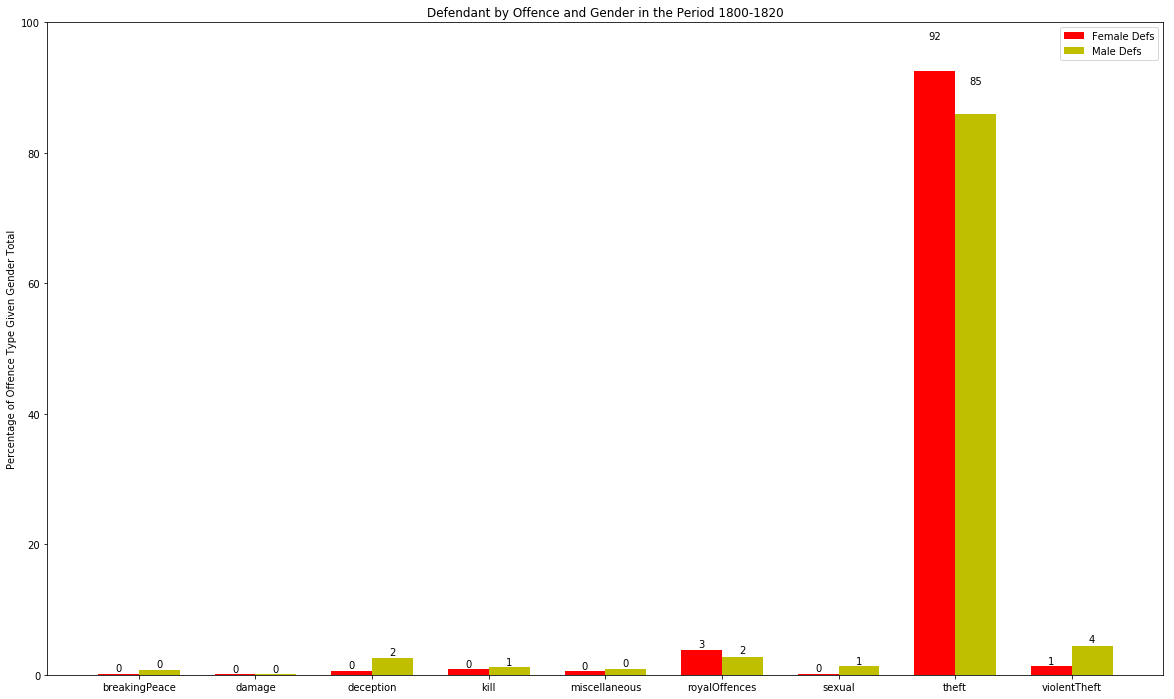

In [41]:
alloffences=dict(periodtrial.groupby('deft_offcat')['obo_trial'].nunique())
femaleoffences=dict(valid_select(periodtrial,[('deft_gender','female')]).groupby('deft_offcat')['obo_trial'].nunique())
maleoffences=dict(valid_select(periodtrial,[('deft_gender','male')]).groupby('deft_offcat')['obo_trial'].nunique())
print(alloffences)
print(femaleoffences)
print(maleoffences)

alist=[]
flist=[]
mlist=[]
for key in alloffences.keys():
    alist.append(alloffences[key])
    flist.append(femaleoffences[key])
    mlist.append(maleoffences[key])
    
flisttotal=sum(flist)
mlisttotal=sum(mlist)
fplist=[x*100/flisttotal for x in flist]
mplist=[x*100/mlisttotal for x in mlist]
N = len(alloffences.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, fplist, width, color='r')

rects2 = ax.bar(ind + width, mplist, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Offence Type Given Gender Total')
ax.set_title('Defendant by Offence and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(alloffences.keys())

ax.legend((rects1[0], rects2[0]), ('Female Defs', 'Male Defs'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

maxheight=max(max(flist),max(mlist))
ax.set_ylim([0,100])
autolabel(rects1)
autolabel(rects2)

plt.show()



In [42]:
genderoffence={'female':flist,'male':mlist}
chisquare_cont(genderoffence)

Observed values:
[[   2    1    7    9    6   41    2 1017   14]
 [  27    4   94   41   35  102   47 3125  161]]
Chi-square, significance, dof, expected values:
(61.191754051899153, 2.7192556063237299e-10, 8, array([[  6.73093981e+00,   1.16050686e+00,   2.34422386e+01,
          1.16050686e+01,   9.51615628e+00,   3.31904963e+01,
          1.13729673e+01,   9.61363886e+02,   4.06177402e+01],
       [  2.22690602e+01,   3.83949314e+00,   7.75577614e+01,
          3.83949314e+01,   3.14838437e+01,   1.09809504e+02,
          3.76270327e+01,   3.18063611e+03,   1.34382260e+02]]))


Conclusion: Offence type is not independent of gender.

{'animalTheft': 115, 'burglary': 192, 'embezzlement': 105, 'grandLarceny': 2579, 'housebreaking': 77, 'mail': 4, 'other': 4, 'pettyLarceny': 9, 'pocketpicking': 357, 'receiving': 31, 'shoplifting': 158, 'theftFromPlace': 511}
{'animalTheft': 5, 'burglary': 13, 'embezzlement': 3, 'grandLarceny': 637, 'housebreaking': 17, 'other': 2, 'pettyLarceny': 1, 'pocketpicking': 88, 'receiving': 7, 'shoplifting': 73, 'theftFromPlace': 171}
{'animalTheft': 110, 'burglary': 179, 'embezzlement': 102, 'grandLarceny': 1942, 'housebreaking': 60, 'mail': 4, 'other': 2, 'pettyLarceny': 8, 'pocketpicking': 269, 'receiving': 24, 'shoplifting': 85, 'theftFromPlace': 340}


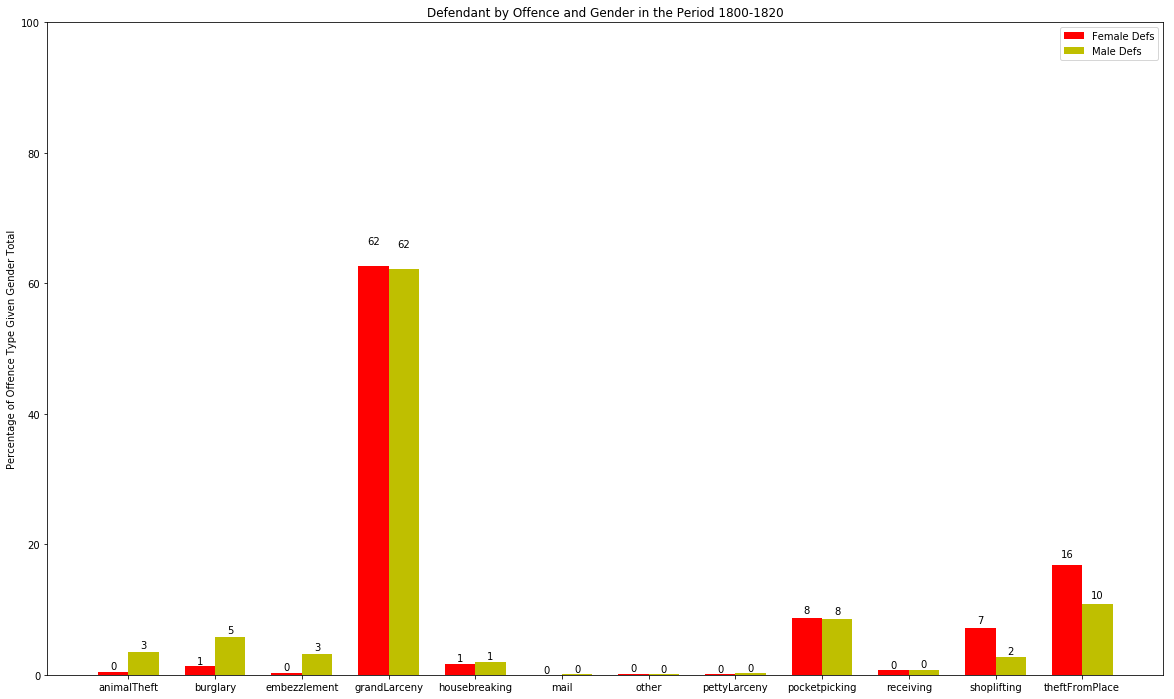

In [43]:
thefttrial=valid_select(periodtrial,[('deft_offcat','theft')])

alloffences=dict(thefttrial.groupby('deft_offsub')['obo_trial'].nunique())
femaleoffences=dict(valid_select(thefttrial,[('deft_gender','female')]).groupby('deft_offsub')['obo_trial'].nunique())
maleoffences=dict(valid_select(thefttrial,[('deft_gender','male')]).groupby('deft_offsub')['obo_trial'].nunique())
print(alloffences)
print(femaleoffences)
print(maleoffences)

alist=[]
flist=[]
mlist=[]
for key in alloffences.keys():
    alist.append(alloffences[key])
    flist.append(femaleoffences.get(key,0))
    mlist.append(maleoffences.get(key,0))
    
flisttotal=sum(flist)
mlisttotal=sum(mlist)
fplist=[x*100/flisttotal for x in flist]
mplist=[x*100/mlisttotal for x in mlist]
N = len(alloffences.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, fplist, width, color='r')

rects2 = ax.bar(ind + width, mplist, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Offence Type Given Gender Total')
ax.set_title('Defendant by Offence and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(alloffences.keys())

ax.legend((rects1[0], rects2[0]), ('Female Defs', 'Male Defs'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

maxheight=max(max(flist),max(mlist))
ax.set_ylim([0,100])
autolabel(rects1)
autolabel(rects2)

plt.show()



In [44]:
gendersub={'female':flist,'male':mlist}
chisquare_cont(gendersub)

Observed values:
[[   5   13    3  637   17    0    2    1   88    7   73  171]
 [ 110  179  102 1942   60    4    2    8  269   24   85  340]]
Chi-square, significance, dof, expected values:
(150.60605162817978, 1.1207085844256276e-26, 11, array([[  2.82363592e+01,   4.71424433e+01,   2.57810237e+01,
          6.33231048e+02,   1.89060840e+01,   9.82134235e-01,
          9.82134235e-01,   2.20980203e+00,   8.76554804e+01,
          7.61154032e+00,   3.87943023e+01,   1.25467648e+02],
       [  8.67636408e+01,   1.44857557e+02,   7.92189763e+01,
          1.94576895e+03,   5.80939160e+01,   3.01786577e+00,
          3.01786577e+00,   6.79019797e+00,   2.69344520e+02,
          2.33884597e+01,   1.19205698e+02,   3.85532352e+02]]))


Conclusion: Type of theft is not independent of gender

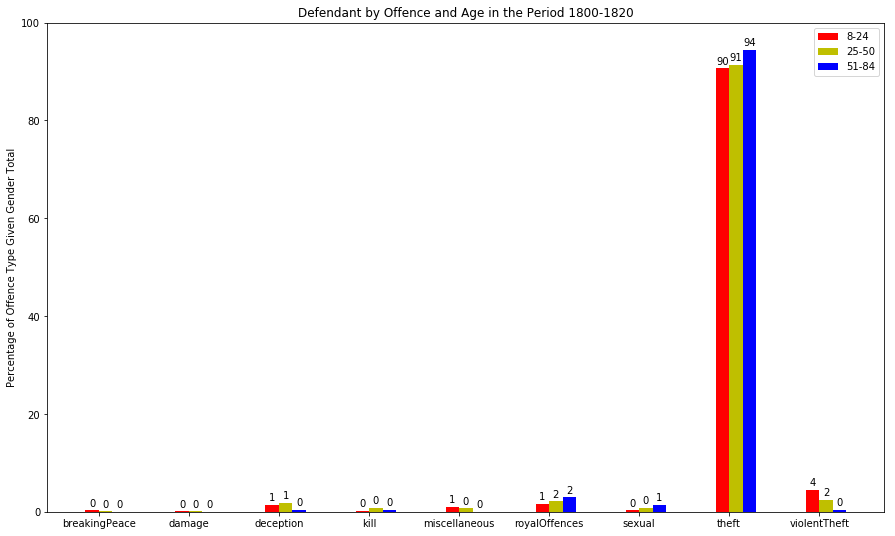

In [45]:
alloffences=dict(periodtrial.groupby('deft_offcat')['obo_trial'].nunique())

q1offences=dict(valid_select(periodtrial,[('deft_age:min',8),('deft_age:max',24)]).groupby('deft_offcat')['obo_trial'].nunique())
q2offences=dict(valid_select(periodtrial,[('deft_age:min',25),('deft_age:max',50)]).groupby('deft_offcat')['obo_trial'].nunique())
q3offences=dict(valid_select(periodtrial,[('deft_age:min',51),('deft_age:max',84)]).groupby('deft_offcat')['obo_trial'].nunique())


offences=[q1offences,q2offences,q3offences]


alist=[]
lists=[[],[],[]]

for key in alloffences.keys():
    alist.append(alloffences[key])
    
    for blist,offencequartile in zip(lists,offences):
        blist.append(offencequartile.get(key,0))
  

newlists=[]
for blist in lists:    
    total=sum(blist)
    newlists.append([x*100/total for x in blist])

#lists=newlists

N = len(alloffences.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))
rects1 = ax.bar(ind, newlists[0], width, color='r')

rects2 = ax.bar(ind + width, newlists[1], width, color='y')
rects3=ax.bar(ind+2*width,newlists[2],width,color='b')
# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Offence Type Given Gender Total')
ax.set_title('Defendant by Offence and Age in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(alloffences.keys())

ax.legend((rects1[0], rects2[0],rects3[0]), ('8-24', '25-50', '51-84'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.5,
                '%s' % int(height),ha='center', va='bottom')

#maxheight=max(max(lists[0]),max(lists[1],max(lists[2],max(lists[3]))))
ax.set_ylim([0,100])
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()



In [46]:
ageoff={}
for idx,alist in enumerate(lists):
    ageoff[idx]=alist
chisquare_cont(ageoff)

Observed values:
[[   4    1   19    3   15   23    4 1257   61]
 [   1    1   28   12   11   34   14 1464   39]
 [   0    0    1    1    0    8    4  256    1]]
Chi-square, significance, dof, expected values:
(39.974481678672838, 0.00078529685909997594, 16, array([[  2.12599632e+00,   8.50398529e-01,   2.04095647e+01,
          6.80318823e+00,   1.10551809e+01,   2.76379522e+01,
          9.35438381e+00,   1.26581821e+03,   4.29451257e+01],
       [  2.45861435e+00,   9.83445739e-01,   2.36026977e+01,
          7.86756591e+00,   1.27847946e+01,   3.19619865e+01,
          1.08179031e+01,   1.46385898e+03,   4.96640098e+01],
       [  4.15389332e-01,   1.66155733e-01,   3.98773758e+00,
          1.32924586e+00,   2.16002452e+00,   5.40006131e+00,
          1.82771306e+00,   2.47322808e+02,   8.39086450e+00]]))


Conclusion: Offence type is not independent of age group

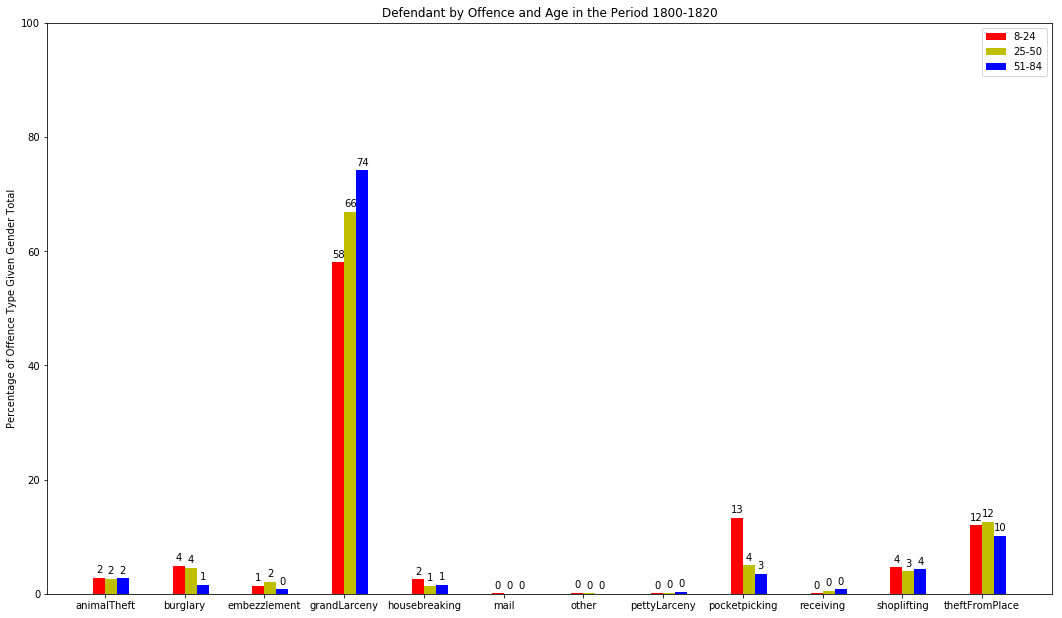

In [47]:


alloffences=dict(thefttrial.groupby('deft_offsub')['obo_trial'].nunique())

offences=[]
lists=[]
for mini,maxi in zip(mins,maxes):
    offences.append(dict(valid_select(thefttrial,[('deft_age:min',mini),('deft_age:max',maxi)]).groupby('deft_offsub')['obo_trial'].nunique()))
    lists.append([])

alist=[]

for key in alloffences.keys():
    alist.append(alloffences[key])
    
    for blist,offencequartile in zip(lists,offences):
        blist.append(offencequartile.get(key,0))
  

newlists=[]
for blist in lists:    
    total=sum(blist)
    newlists.append([x*100/total for x in blist])

#lists=newlists
colors=['r','y','b','g']
N = len(alloffences.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.15       # the width of the bars

fig, ax = plt.subplots(figsize=(18,10.5))

rects=[]
for idx,newlist in enumerate(newlists):
    rects.append(ax.bar(ind + idx*width, newlist, width, color=colors[idx]))

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Offence Type Given Gender Total')
ax.set_title('Defendant by Offence and Age in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(alloffences.keys())

ax.legend(rects, agegroups)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,height+0.5,
                '%s' % int(height),ha='center', va='bottom')

#maxheight=max(max(lists[0]),max(lists[1],max(lists[2],max(lists[3]))))
ax.set_ylim([0,100])
for rect in rects:
    autolabel(rect)

plt.show()



In [48]:
agesub={}
for idx,alist in enumerate(lists):
    agesub[idx]=alist
    
chisquare_cont(agesub)

Observed values:
[[ 35  61  17 730  32   1   2   1 168   1  58 151]
 [ 39  66  31 979  21   0   1   3  73   8  58 185]
 [  7   4   2 190   4   0   0   1   9   2  11  26]]
Chi-square, significance, dof, expected values:
(101.81652289478755, 3.1008102522696933e-12, 22, array([[  3.42012093e+01,   5.53130668e+01,   2.11118576e+01,
          8.01828351e+02,   2.40675176e+01,   4.22237151e-01,
          1.26671145e+00,   2.11118576e+00,   1.05559288e+02,
          4.64460867e+00,   5.36241182e+01,   1.52849849e+02],
       [  3.98333893e+01,   6.44219012e+01,   2.45885119e+01,
          9.33871683e+02,   2.80309036e+01,   4.91770238e-01,
          1.47531072e+00,   2.45885119e+00,   1.22942560e+02,
          5.40947262e+00,   6.24548203e+01,   1.78020826e+02],
       [  6.96540141e+00,   1.12650319e+01,   4.29963050e+00,
          1.63299966e+02,   4.90157877e+00,   8.59926100e-02,
          2.57977830e-01,   4.29963050e-01,   2.14981525e+01,
          9.45918710e-01,   1.09210615e+01,   3.

Conclusion: theft type is not independent of age group

### Speech by Offence Type


In [49]:
sorted(perioddata['deft_offcat'].unique())

['breakingPeace',
 'damage',
 'deception',
 'kill',
 'miscellaneous',
 'royalOffences',
 'sexual',
 'theft',
 'violentTheft']

In [50]:
allvalues=[]
for gender in sorted(perioddata['deft_gender'].unique()):
    gendervalues=[]
    for offence in sorted(perioddata['deft_offcat'].unique()):

        reqlist=[('obv_role','def'),('year:max',1820),('year:min',1800),('deft_gender',gender),('deft_offcat',offence)]
        gendervalues.append(corpus_generator(reqlist,worddata,trialdata))
    allvalues.append(gendervalues)
    
print(allvalues)

Generated corpus corpus_def_1820_1800_female_breakingPeace with 1 lines
Generated corpus corpus_def_1820_1800_female_damage with 1 lines
Generated corpus corpus_def_1820_1800_female_deception with 1 lines
Generated corpus corpus_def_1820_1800_female_kill with 2 lines
Generated corpus corpus_def_1820_1800_female_miscellaneous with 5 lines
Generated corpus corpus_def_1820_1800_female_royalOffences with 32 lines
Generated corpus corpus_def_1820_1800_female_sexual with 1 lines
Generated corpus corpus_def_1820_1800_female_theft with 642 lines
Generated corpus corpus_def_1820_1800_female_violentTheft with 12 lines
Generated corpus corpus_def_1820_1800_male_breakingPeace with 30 lines
Generated corpus corpus_def_1820_1800_male_damage with 3 lines
Generated corpus corpus_def_1820_1800_male_deception with 39 lines
Generated corpus corpus_def_1820_1800_male_kill with 45 lines
Generated corpus corpus_def_1820_1800_male_miscellaneous with 15 lines
Generated corpus corpus_def_1820_1800_male_royalOf

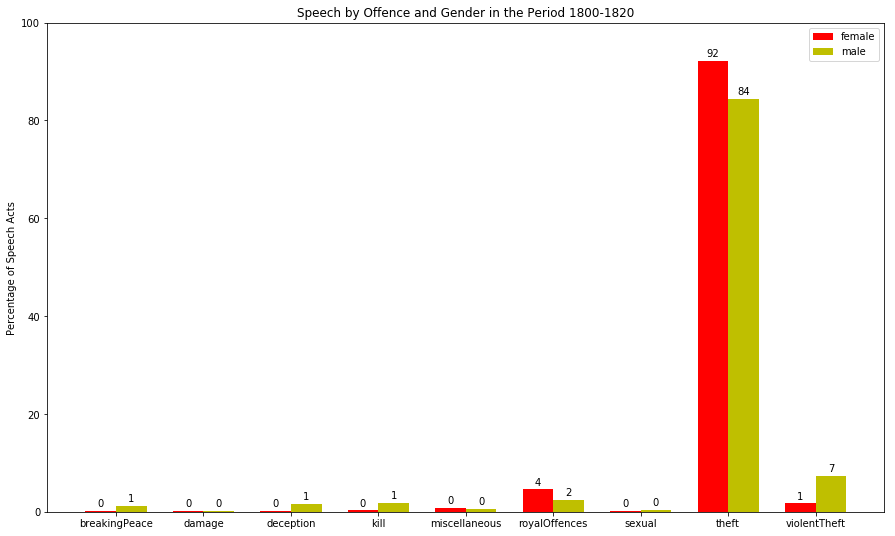

In [51]:

offlist=sorted(perioddata['deft_offcat'].unique())
genlist=sorted(perioddata['deft_gender'].unique())
colors={'male':'y','female':'r'}
morecolors=['r','y','b','g','p','o']


lists=[]
for listofvalues in allvalues:
    total=sum(listofvalues)
    alist=[x*100/total for x in listofvalues]
    lists.append(alist)

N = len(offlist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7/len(genlist)       # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))

rectslist=[]
for idx,gen in enumerate(genlist):
    rectslist.append(ax.bar(ind+idx*width, lists[idx], width, color=colors.get(gen,morecolors[idx])))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Speech Acts')
ax.set_title('Speech by Offence and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, genlist)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.5,
                '%s' % int(height),ha='center', va='bottom')
maxheight = max(lists)
ax.set_ylim([0,100])

for rect in rectslist:
    autolabel(rect)

plt.show()



In [52]:
#compare observed allvalues with prior trial values
genderoffencespeech={}
for gender,vlist in zip(genderoffence.keys(),allvalues):
    genderoffencespeech[gender]=vlist

chi_square(genderoffencespeech,genderoffence)

Observations: [1, 1, 1, 2, 5, 32, 1, 642, 12, 30, 3, 39, 45, 15, 61, 10, 2078, 179]
Expected observations: [1.3334741288278775, 0.66673706441393876, 4.6671594508975716, 6.0006335797254486, 4.0004223864836321, 27.336219640971489, 1.3334741288278775, 678.07159450897575, 9.3343189017951431, 18.001900739176346, 2.6669482576557551, 62.673284054910241, 27.336219640971489, 23.335797254487858, 68.007180570221749, 31.33664202745512, 2083.5533262935587, 107.34466737064415]
Power_divergenceResult(statistic=104.07561503260483, pvalue=1.5541613466785427e-14)


[29, 5, 101, 50, 41, 143, 49, 4142, 175]
[31, 4, 40, 47, 20, 93, 11, 2720, 191]


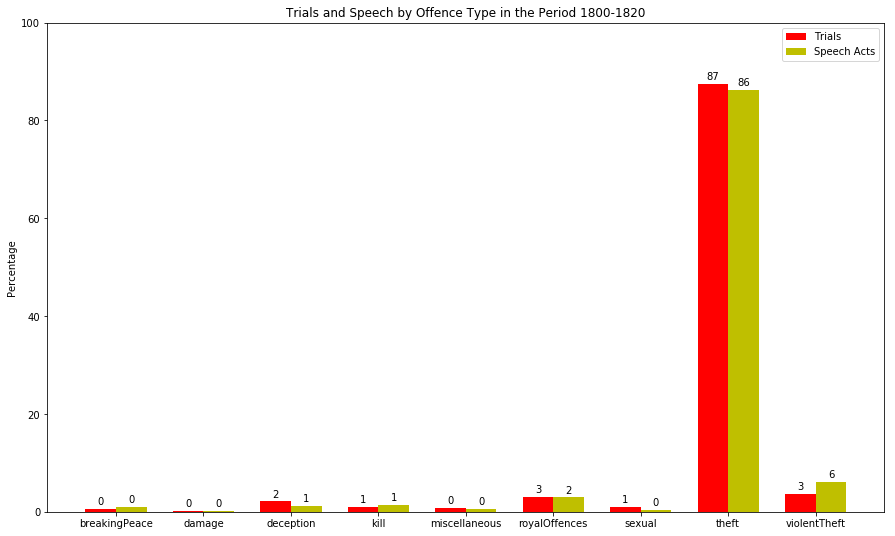

In [53]:
#compare speech and trials by offence on single graph

sumtrials=[]
for trial in genderoffence.values():
    for idx,it in enumerate(trial):
        if idx>=len(sumtrials):
            sumtrials.append(it)
        else:
            sumtrials[idx]+=it
        
sumspeeches=[]
for speech in genderoffencespeech.values():
    for idx, it in enumerate(speech):
        if idx>=len(sumspeeches):
            sumspeeches.append(it)
        else:
            sumspeeches[idx]+=it
    
print (sumtrials)
print (sumspeeches)

props=[]
trialtot=sum(sumtrials)
speechtot=sum(sumspeeches)
props.append([x*100/trialtot for x in sumtrials])
props.append([x*100/speechtot for x in sumspeeches])
N = len(offlist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7/len(genlist)       # the width of the bars

fig, ax = plt.subplots(figsize=(15,9))

rectslist=[]
for idx,gen in enumerate(props):
    rectslist.append(ax.bar(ind+idx*width, props[idx], width, color=morecolors[idx]))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Trials and Speech by Offence Type in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, ['Trials','Speech Acts'])


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.5,
                '%s' % int(height),ha='center', va='bottom')
maxheight = max(max(lists))
ax.set_ylim([0,100])

for rect in rectslist:
    autolabel(rect)

plt.show()

In [54]:
values=[]
for gender in sorted(thefttrial['deft_gender'].unique()):
    gendervalues=[]
    for offence in sorted(thefttrial['deft_offsub'].unique()):

        reqlist=[('obv_role','def'),('year:max',1820),('year:min',1800),('deft_gender',gender),('deft_offsub',offence)]
        gendervalues.append(corpus_generator(reqlist,worddata,trialdata))
    values.append(gendervalues)
    
print(values)

Generated corpus corpus_def_1820_1800_female_animalTheft with 3 lines
Generated corpus corpus_def_1820_1800_female_burglary with 11 lines
Generated corpus corpus_def_1820_1800_female_embezzlement with 0 lines
Generated corpus corpus_def_1820_1800_female_grandLarceny with 404 lines
Generated corpus corpus_def_1820_1800_female_housebreaking with 11 lines
Generated corpus corpus_def_1820_1800_female_mail with 0 lines
Generated corpus corpus_def_1820_1800_female_other with 2 lines
Generated corpus corpus_def_1820_1800_female_pettyLarceny with 1 lines
Generated corpus corpus_def_1820_1800_female_pocketpicking with 63 lines
Generated corpus corpus_def_1820_1800_female_receiving with 2 lines
Generated corpus corpus_def_1820_1800_female_shoplifting with 47 lines
Generated corpus corpus_def_1820_1800_female_theftFromPlace with 98 lines
Generated corpus corpus_def_1820_1800_male_animalTheft with 91 lines
Generated corpus corpus_def_1820_1800_male_burglary with 163 lines
Generated corpus corpus_d

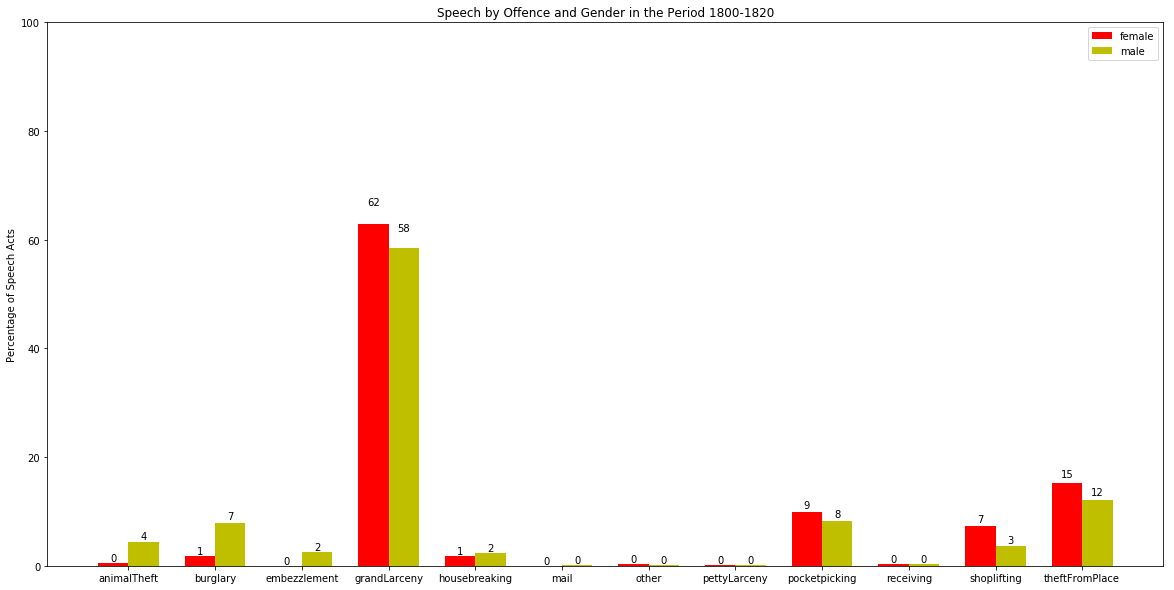

In [55]:
offlist=sorted(thefttrial['deft_offsub'].unique())
genlist=sorted(thefttrial['deft_gender'].unique())
colors={'male':'y','female':'r'}
morecolors=['r','y','b','g','p','o']


lists=[]
for listofvalues in values:
    total=sum(listofvalues)
    alist=[x*100/total for x in listofvalues]
    lists.append(alist)

N = len(offlist)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rectslist=[]
for idx,gen in enumerate(genlist):
    rectslist.append(ax.bar(ind+idx*width, lists[idx], width, color=colors.get(gen,morecolors[idx])))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Speech Acts')
ax.set_title('Speech by Offence and Gender in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, genlist)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')
maxheight =max(lists)
ax.set_ylim([0,100])

for rect in rectslist:
    autolabel(rect)

plt.show()


[115, 192, 105, 2579, 77, 4, 4, 9, 357, 31, 158, 511]
[94, 174, 51, 1619, 59, 3, 6, 3, 234, 10, 122, 348]


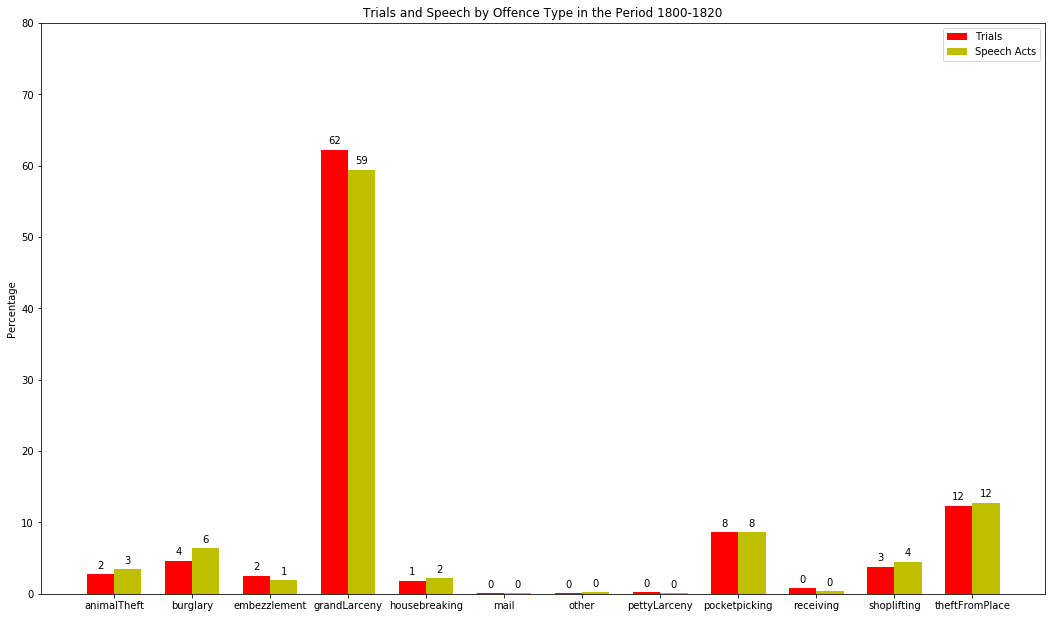

In [56]:
#compare speech and trials by offence on single graph

sumtrials=[]
for trial in gendersub.values():
    for idx,it in enumerate(trial):
        if idx>=len(sumtrials):
            sumtrials.append(it)
        else:
            sumtrials[idx]+=it
        
sumspeeches=[]
for speech in values:
    for idx, it in enumerate(speech):
        if idx>=len(sumspeeches):
            sumspeeches.append(it)
        else:
            sumspeeches[idx]+=it
    
print (sumtrials)
print (sumspeeches)

props=[]
trialtot=sum(sumtrials)
speechtot=sum(sumspeeches)
props.append([x*100/trialtot for x in sumtrials])
props.append([x*100/speechtot for x in sumspeeches])
N = len(offlist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7/len(genlist)       # the width of the bars

fig, ax = plt.subplots(figsize=(18,10.5))

rectslist=[]
for idx,gen in enumerate(props):
    rectslist.append(ax.bar(ind+idx*width, props[idx], width, color=morecolors[idx]))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage')
ax.set_title('Trials and Speech by Offence Type in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, ['Trials','Speech Acts'])


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height+0.5,
                '%s' % int(height),ha='center', va='bottom')
maxheight = max(max(lists))
ax.set_ylim([0,80])

for rect in rectslist:
    autolabel(rect)

plt.show()

In [57]:
agevalues=[]

for idx,ag in enumerate(agegroups):
    gendervalues=[]
    for offence in sorted(perioddata['deft_offcat'].unique()):

        reqlist=[('obv_role','def'),('year:max',1820),('year:min',1800),('deft_age:min',mins[idx]),('deft_age:max',maxes[idx]),('deft_offcat',offence)]
        gendervalues.append(corpus_generator(reqlist,worddata,trialdata))
    agevalues.append(gendervalues)
    
print(agevalues)

Generated corpus corpus_def_1820_1800_8_24_breakingPeace with 10 lines
Generated corpus corpus_def_1820_1800_8_24_damage with 1 lines
Generated corpus corpus_def_1820_1800_8_24_deception with 15 lines
Generated corpus corpus_def_1820_1800_8_24_kill with 1 lines
Generated corpus corpus_def_1820_1800_8_24_miscellaneous with 10 lines
Generated corpus corpus_def_1820_1800_8_24_royalOffences with 24 lines
Generated corpus corpus_def_1820_1800_8_24_sexual with 1 lines
Generated corpus corpus_def_1820_1800_8_24_theft with 863 lines
Generated corpus corpus_def_1820_1800_8_24_violentTheft with 81 lines
Generated corpus corpus_def_1820_1800_25_50_breakingPeace with 2 lines
Generated corpus corpus_def_1820_1800_25_50_damage with 0 lines
Generated corpus corpus_def_1820_1800_25_50_deception with 16 lines
Generated corpus corpus_def_1820_1800_25_50_kill with 11 lines
Generated corpus corpus_def_1820_1800_25_50_miscellaneous with 9 lines
Generated corpus corpus_def_1820_1800_25_50_royalOffences with

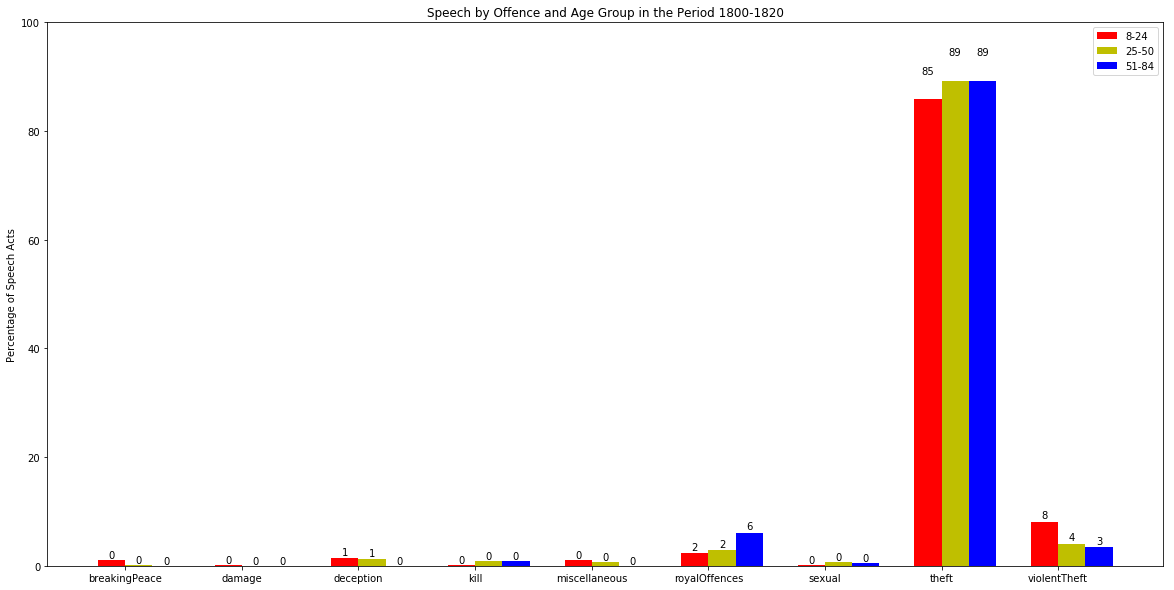

In [58]:

offlist=sorted(perioddata['deft_offcat'].unique())

morecolors=['r','y','b','g','p','o']


lists=[]
for listofvalues in agevalues:
    total=sum(listofvalues)
    alist=[x*100/total for x in listofvalues]
    lists.append(alist)

N = len(offlist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7/len(agegroups)       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rectslist=[]
#print(len(agegroups))
#print(len(lists))
for idx,gen in enumerate(agegroups):
    rectslist.append(ax.bar(ind+idx*width, lists[idx], width, color=colors.get(gen,morecolors[idx])))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Speech Acts')
ax.set_title('Speech by Offence and Age Group in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, agegroups)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')
maxheight = max(max(lists))
ax.set_ylim([0,100])

for rect in rectslist:
    autolabel(rect)

plt.show()



In [59]:
theftvalues=[]
for idx,ag in enumerate(agegroups):
    gendervalues=[]
    for offence in sorted(thefttrial['deft_offsub'].unique()):
        reqlist=[('obv_role','def'),('year:max',1820),('year:min',1800),('deft_age:min',mins[idx]),('deft_age:max',maxes[idx]),('deft_offsub',offence)]
        gendervalues.append(corpus_generator(reqlist,worddata,trialdata))
    theftvalues.append(gendervalues)
    
print(theftvalues)

Generated corpus corpus_def_1820_1800_8_24_animalTheft with 33 lines
Generated corpus corpus_def_1820_1800_8_24_burglary with 58 lines
Generated corpus corpus_def_1820_1800_8_24_embezzlement with 10 lines
Generated corpus corpus_def_1820_1800_8_24_grandLarceny with 453 lines
Generated corpus corpus_def_1820_1800_8_24_housebreaking with 29 lines
Generated corpus corpus_def_1820_1800_8_24_mail with 1 lines
Generated corpus corpus_def_1820_1800_8_24_other with 4 lines
Generated corpus corpus_def_1820_1800_8_24_pettyLarceny with 0 lines
Generated corpus corpus_def_1820_1800_8_24_pocketpicking with 117 lines
Generated corpus corpus_def_1820_1800_8_24_receiving with 1 lines
Generated corpus corpus_def_1820_1800_8_24_shoplifting with 42 lines
Generated corpus corpus_def_1820_1800_8_24_theftFromPlace with 117 lines
Generated corpus corpus_def_1820_1800_25_50_animalTheft with 34 lines
Generated corpus corpus_def_1820_1800_25_50_burglary with 74 lines
Generated corpus corpus_def_1820_1800_25_50_

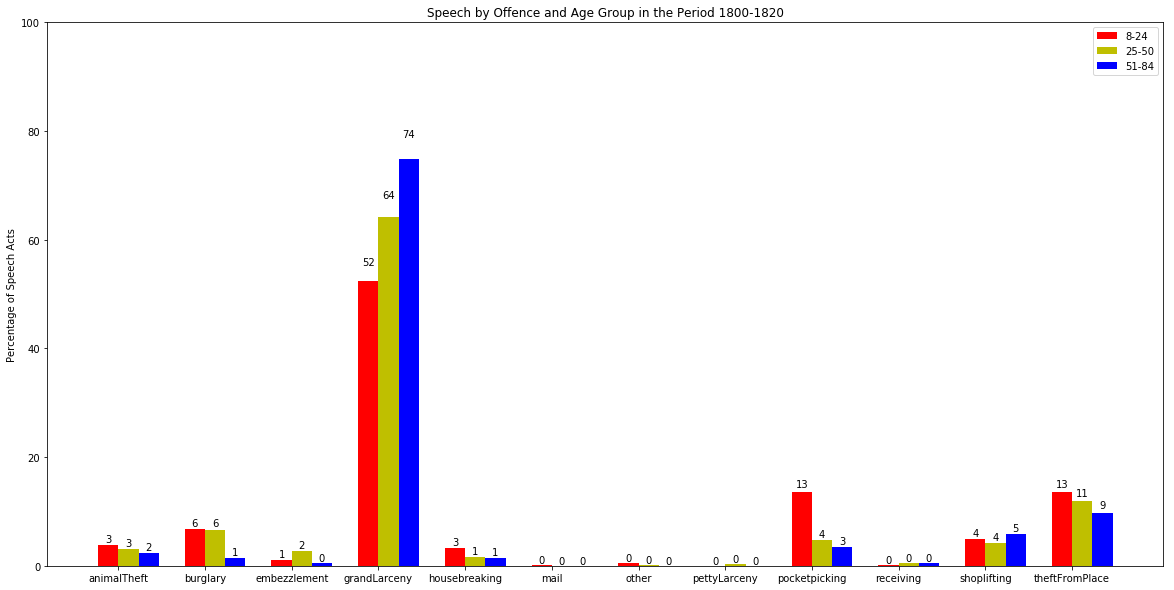

In [60]:

offlist=sorted(thefttrial['deft_offsub'].unique())

morecolors=['r','y','b','g','p','o']


lists=[]
for listofvalues in theftvalues:
    total=sum(listofvalues)
    alist=[x*100/total for x in listofvalues]
    lists.append(alist)

N = len(offlist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7/len(agegroups)       # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rectslist=[]
#print(len(agegroups))
#print(len(lists))
for idx,gen in enumerate(agegroups):
    rectslist.append(ax.bar(ind+idx*width, lists[idx], width, color=colors.get(gen,morecolors[idx])))
                
    

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Speech Acts')
ax.set_title('Speech by Offence and Age Group in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(offlist)

ax.legend(rectslist, agegroups)


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')
maxheight = max(max(lists))
ax.set_ylim([0,100])

for rect in rectslist:
    autolabel(rect)

plt.show()



## Analysis of No Age Given Trials

In [61]:
perioddata.groupby('deft_age')['obo_trial'].nunique()

deft_age
8.0       1
9.0       3
10.0      4
11.0     15
12.0     21
13.0     41
14.0     47
15.0     69
16.0     71
17.0     96
18.0    147
19.0    157
20.0    161
21.0    145
22.0    162
23.0    125
24.0    122
25.0    114
26.0    106
27.0    104
28.0    124
29.0     85
30.0    159
31.0     49
32.0     69
33.0     70
34.0     47
35.0     67
36.0     61
37.0     43
       ... 
49.0     26
50.0     41
51.0     11
52.0     24
53.0     17
54.0     11
55.0     23
56.0     23
57.0      7
58.0     13
59.0     21
60.0     27
61.0      7
62.0     15
63.0      9
64.0     11
65.0      6
66.0     12
67.0      8
68.0      3
69.0      4
70.0      4
71.0      2
73.0      2
74.0      4
75.0      1
76.0      1
77.0      3
83.0      1
84.0      1
Name: obo_trial, dtype: int64

In [62]:
noagedata=perioddata[np.isnan(perioddata['deft_age'])]
noagedata.head()

,obo_trial,obo_deftid,sess_date,year,trial_tagged,obv_def_spk,speech,trial_u_count,trial_speech_wc,trial_total_wc,...,deft_surname,deft_gender,deft_age,deft_occupation,deft_offcat,deft_offsub,deft_vercat,deft_versub,deft_puncat,deft_punsub
o2dtid,,,,,,,,,,,,,,,,,,,,,
2661,t18000115-1,t18000115-1-defend46,18000115,1800,1,0.0,deft_silent,108.0,1427.0,1685,...,GOWENS,male,NaN,NaN,violentTheft,highwayRobbery,notGuilty,NaN,NaN,NaN
2664,t18000115-4,t18000115-4-defend70,18000115,1800,1,1.0,deft_speaks,8.0,248.0,326,...,EALEY,male,NaN,NaN,theft,burglary,notGuilty,NaN,NaN,NaN
2667,t18000115-7,t18000115-7-defend89,18000115,1800,1,0.0,deft_silent,19.0,348.0,512,...,PRICE,male,NaN,NaN,theft,grandLarceny,notGuilty,NaN,NaN,NaN
2668,t18000115-8,t18000115-8-defend102,18000115,1800,0,NaN,no_speech,NaN,NaN,59,...,M'MAR,male,NaN,NaN,theft,grandLarceny,notGuilty,fault,NaN,NaN
2669,t18000115-9,t18000115-9-defend113,18000115,1800,1,1.0,deft_speaks,25.0,805.0,990,...,THOMAS,male,NaN,NaN,theft,burglary,notGuilty,NaN,NaN,NaN


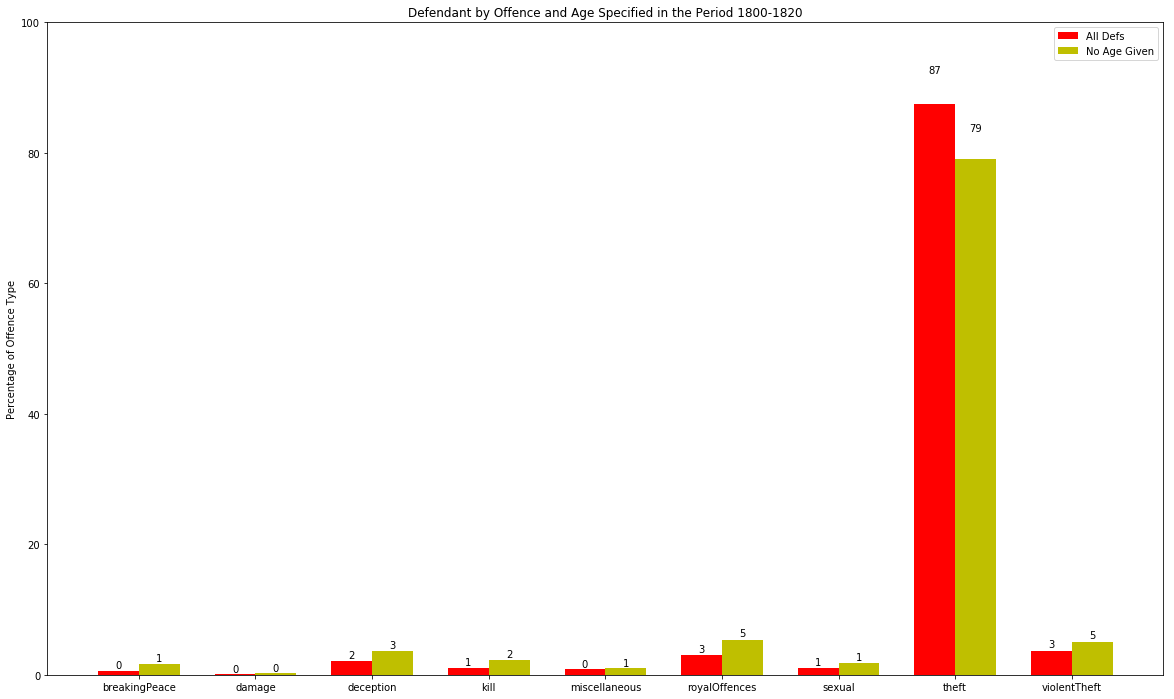

In [63]:
noageoffences=dict(noagedata.groupby('deft_offcat')['obo_trial'].nunique())
alloffences=dict(perioddata.groupby('deft_offcat')['obo_trial'].nunique())


allist=[]
noagelist=[]
for key in alloffences.keys():
    allist.append(alloffences[key])
    noagelist.append(noageoffences[key])
 
    
allisttotal=sum(allist)
noagelisttotal=sum(noagelist)
all_per_list=[x*100/allisttotal for x in allist]
noage_per_list=[x*100/noagelisttotal for x in noagelist]
N = len(alloffences.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, all_per_list, width, color='r')
rects2 = ax.bar(ind + width, noage_per_list, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Offence Type')
ax.set_title('Defendant by Offence and Age Specified in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(alloffences.keys())

ax.legend((rects1[0], rects2[0]), ('All Defs', 'No Age Given'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

maxheight=max(all_per_list+noage_per_list)
ax.set_ylim([0,100])
autolabel(rects1)
autolabel(rects2)

plt.show()



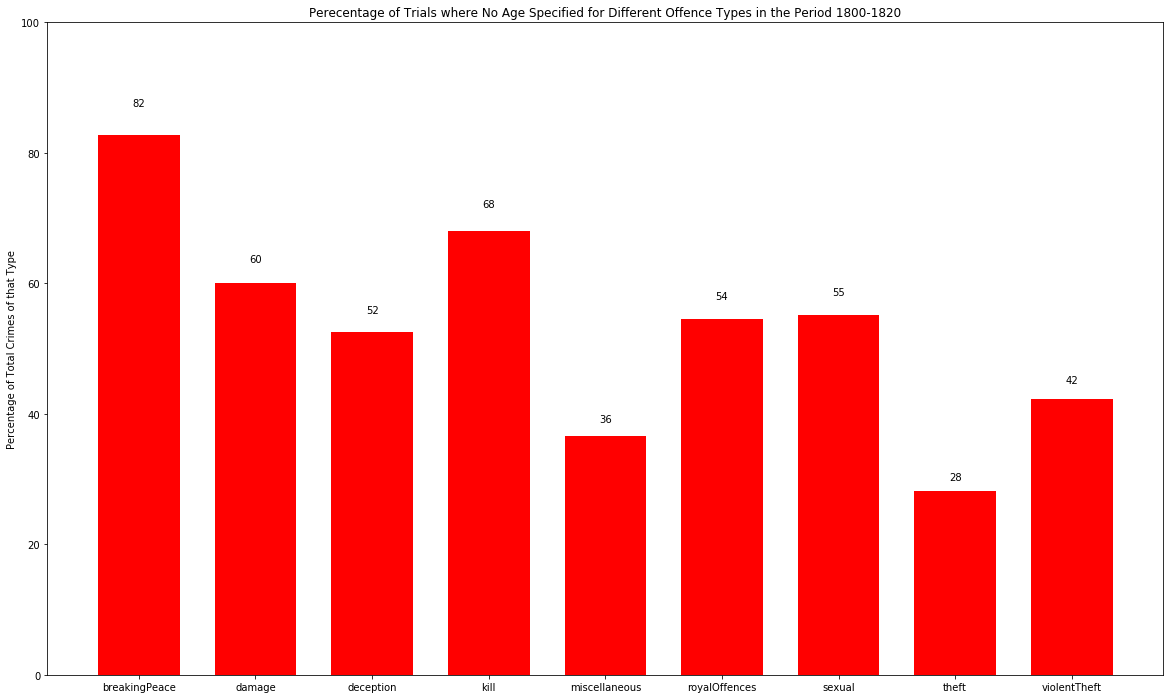

In [64]:
proplist=[]
for noage,allp in zip(noagelist,allist):
    proplist.append(noage*100/allp)
    
N = len(proplist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, proplist, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Total Crimes of that Type')
ax.set_title('Perecentage of Trials where No Age Specified for Different Offence Types in the Period 1800-1820')
ax.set_xticks(ind)
ax.set_xticklabels(alloffences.keys())

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

ax.set_ylim([0,100])
autolabel(rects1)

plt.show()

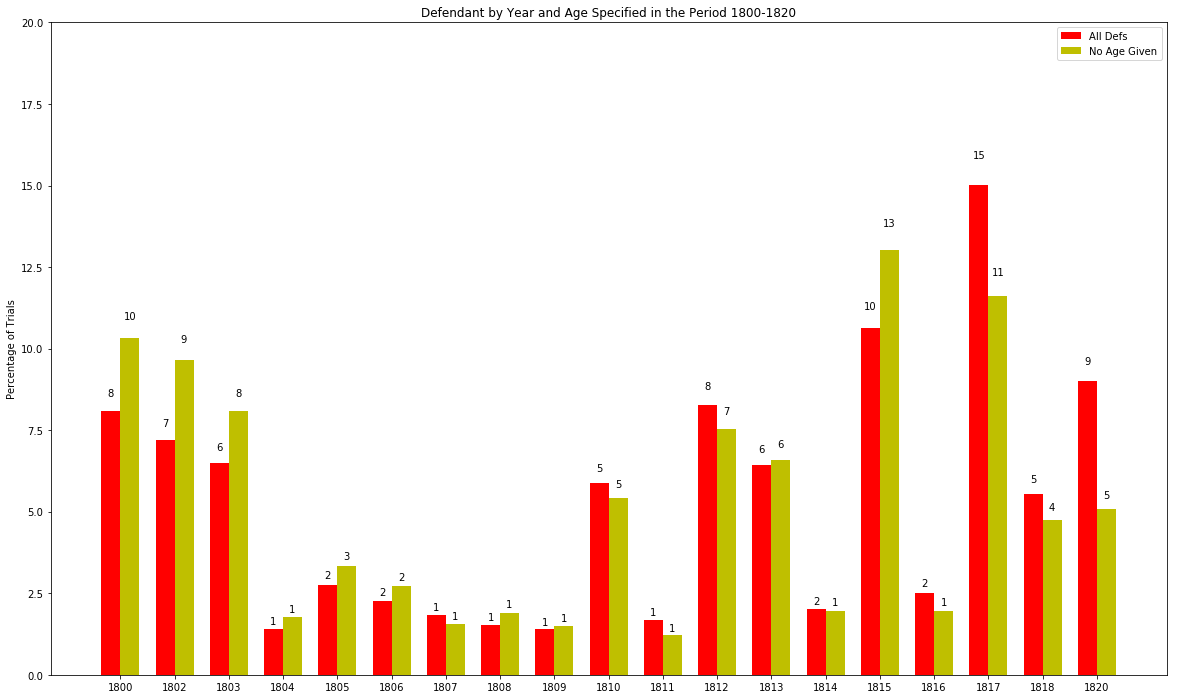

In [65]:
noageyears=dict(noagedata.groupby('year')['obo_trial'].nunique())
allyears=dict(perioddata.groupby('year')['obo_trial'].nunique())



allist=[]
noagelist=[]
for key in allyears.keys():
    allist.append(allyears[key])
    noagelist.append(noageyears[key])
 
    
allisttotal=sum(allist)
noagelisttotal=sum(noagelist)
all_per_list=[x*100/allisttotal for x in allist]
noage_per_list=[x*100/noagelisttotal for x in noagelist]
N = len(allyears.keys())

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, all_per_list, width, color='r')
rects2 = ax.bar(ind + width, noage_per_list, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Trials')
ax.set_title('Defendant by Year and Age Specified in the Period 1800-1820')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(allyears.keys())

ax.legend((rects1[0], rects2[0]), ('All Defs', 'No Age Given'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

maxheight=max(all_per_list+noage_per_list)
ax.set_ylim([0,20])
autolabel(rects1)
autolabel(rects2)

plt.show()



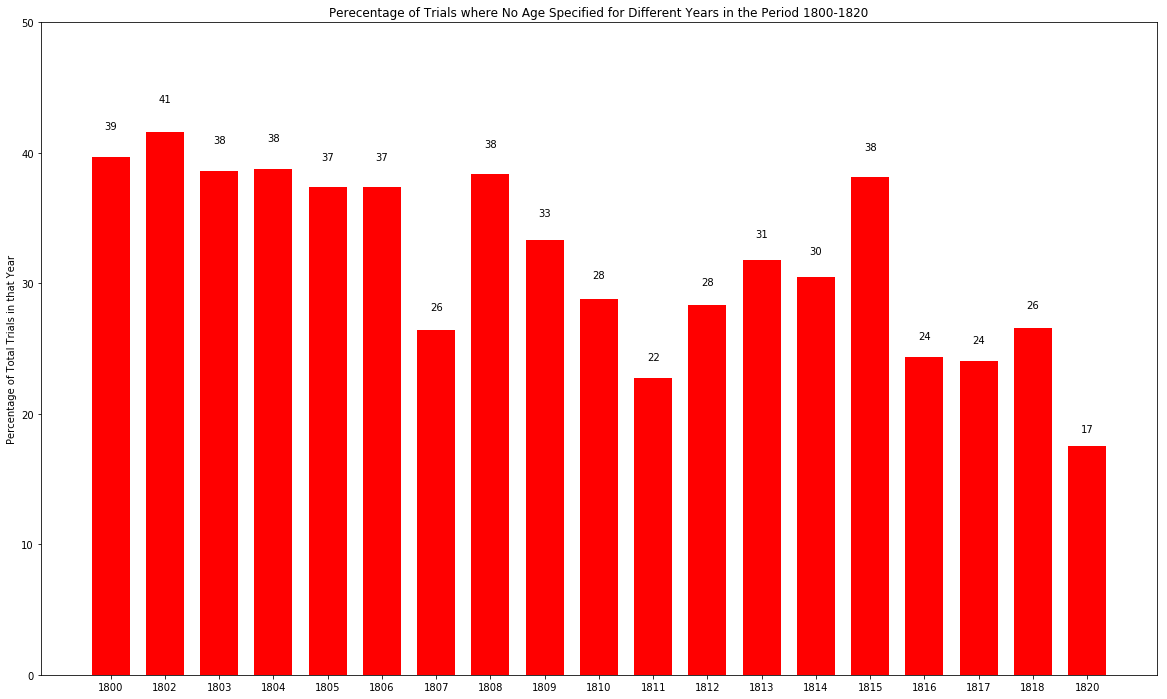

In [66]:
proplist=[]
for noage,allp in zip(noagelist,allist):
    proplist.append(noage*100/allp)
    
N = len(proplist)

ind = np.arange(N)  # the x locations for the groups
width = 0.7       # the width of the bars

fig, ax = plt.subplots(figsize=(20,12))
rects1 = ax.bar(ind, proplist, width, color='r')


# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of Total Trials in that Year')
ax.set_title('Perecentage of Trials where No Age Specified for Different Years in the Period 1800-1820')
ax.set_xticks(ind)
ax.set_xticklabels(allyears.keys())

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%s' % int(height),ha='center', va='bottom')

ax.set_ylim([0,50])
autolabel(rects1)

plt.show()

## Non-legal speech in theft trials

First lets check how many female and male defendants in the period.

In [68]:
perioddata.groupby('deft_gender')['obo_trial'].nunique()



deft_gender
female    1099
male      3636
Name: obo_trial, dtype: int64

In [73]:
periodtheft=perioddata[perioddata['deft_offcat']=='theft']
periodtheft.groupby('deft_gender')['obo_trial'].nunique()


deft_gender
female    1017
male      3125
Name: obo_trial, dtype: int64

In [75]:
roles=['def','wv','lj']
allreqlist=[('year:min',1800),('year:max',1820),('deft_offcat','theft')]
genders=['f','m']

theftrolevalues=[]
for role in roles:
    rolevalues=[]
    for gender in genders:
        reqlist=allreqlist+[('obc_sex',gender),('obv_role',role)]
        rolevalues.append(corpus_generator(reqlist,worddata,trialdata))
    theftrolevalues.append(rolevalues)
    
print(theftrolevalues)

Generated corpus corpus_1800_1820_theft_f_def with 547 lines
Generated corpus corpus_1800_1820_theft_m_def with 1860 lines
Generated corpus corpus_1800_1820_theft_f_wv with 4330 lines
Generated corpus corpus_1800_1820_theft_m_wv with 20418 lines
Generated corpus corpus_1800_1820_theft_f_lj with 6 lines
Generated corpus corpus_1800_1820_theft_m_lj with 13935 lines
[[547, 1860], [4330, 20418], [6, 13935]]
